# Random Walks and the Normal Distribution

**Demonstrating the Central Limit Theorem**

## The Setup

Imagine **N people** standing on a football field at the 50-yard line (position = 0).

Each person flips a coin repeatedly:
- **Heads (1)**: Step right (+1 yard)
- **Tails (0)**: Step left (-1 yard)

After many coin flips, where are they?

## The Key Insight

**Individual steps**: Bernoulli (discrete, binary)
- Each step is ±1
- Completely random
- No memory of previous steps

**Final position (sum of many steps)**: Approximately Normal!
- Continuous distribution emerges
- Bell-shaped curve
- This is the **Central Limit Theorem** in action

## Why This Matters

This explains why Normal distributions appear everywhere:
- **Heights**: Sum of many genetic and environmental factors
- **Measurement errors**: Sum of many small errors
- **Stock returns**: Sum of many small price changes
- **Test scores**: Sum of many small skill/luck factors

**Any sum of many independent random effects → Normal distribution!**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('default')
%matplotlib inline

print('✓ Imports loaded')

✓ Imports loaded


---

## Simulation 1: Basic Random Walk

Let's simulate **100 people**, each taking **100 steps**.

In [14]:
# Parameters
N_people = 100      # Number of people on the field
N_steps = 10000       # Number of coin flips per person

# Starting position (everyone at position 0)
positions = np.zeros(N_people)

# Set seed for reproducibility
np.random.seed(47)

# Simulate N_steps coin flips for each person
for step in range(N_steps):
    # Flip coin for each person: 1 (heads) or 0 (tails)
    tosses = np.random.binomial(n=1, p=0.5, size=N_people)
    
    # Convert 0 → -1 (step left), keep 1 → +1 (step right)
    tosses[tosses == 0] = -1
    
    # Update positions
    positions = positions + tosses

print(f"After {N_steps} steps:")
print(f"Final positions: {positions}")
print(f"\nStatistics:")
print(f"  Mean: {positions.mean():.2f}")
print(f"  Std Dev: {positions.std():.2f}")
print(f"  Range: [{positions.min():.0f}, {positions.max():.0f}]")

After 10000 steps:
Final positions: [ -22.  -64.  -84.   10.  204.  118.  -66.  -46.   20.  212.  -40. -140.
  -28.   76.   36.   18.   62.   94.  194. -132.  -28.  -12.   38.  -54.
  112.  -12.   70.   20.  -22.    6.   82.    4.  -38.   78.  -36.   66.
  124.   76.  110.  -40.  196.  134.  -62.  -66.  -40.  -66.   -2.   34.
  -72.  -50.   58.   94.   22.    0.   22. -198. -138.  114.  134.  -30.
  -38.   82.   12.  140.  234.   -4. -148.   74.   26.  -72.  -56.  120.
   12.  -54.  -66.   18.    8.  -90.   70.   20.   88.  132.    4.   78.
   -2.   84.  -40.   20.  172.   14. -190. -148. -234.   18.  -84. -104.
  152. -236.   96.  -64.]

Statistics:
  Mean: 10.94
  Std Dev: 95.57
  Range: [-236, 234]


### Visualize the Distribution

Let's plot the histogram and compare with the theoretical Normal distribution.

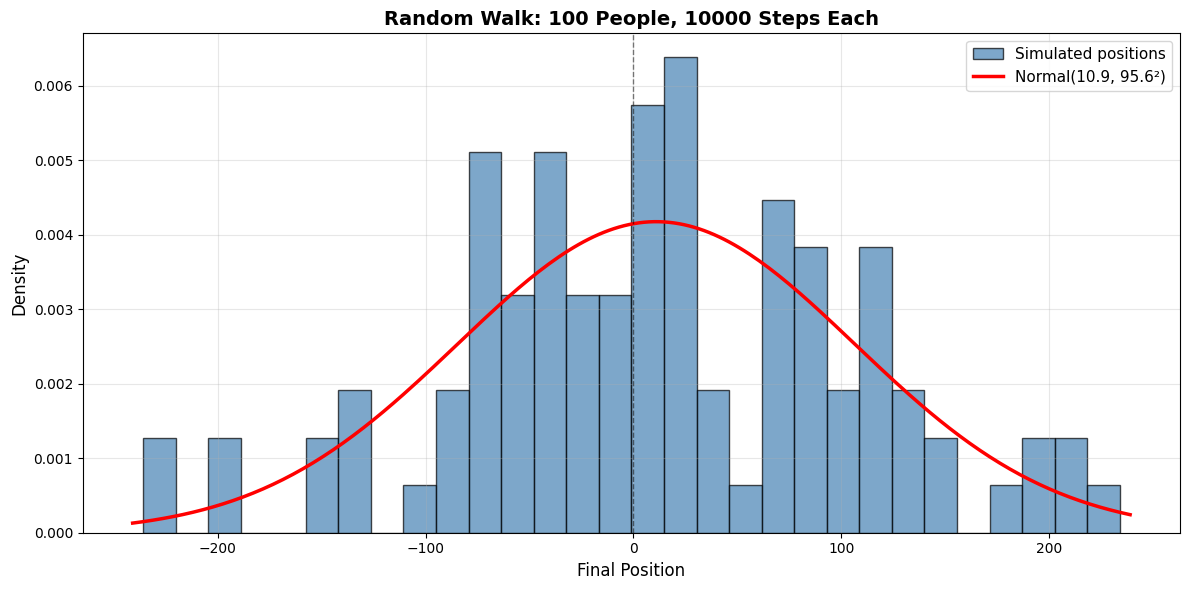

Observation: The simulated positions (blue bars) closely match the Normal curve (red line)!
This is the Central Limit Theorem in action.


In [15]:
# Create figure
plt.figure(figsize=(12, 6))

# Histogram of final positions
plt.hist(positions, bins=30, density=True, alpha=0.7, color='steelblue', 
         edgecolor='black', label='Simulated positions')

# Theoretical Normal distribution
mean_pos = positions.mean()
std_pos = positions.std()
x_range = np.linspace(positions.min()-5, positions.max()+5, 200)
normal_pdf = stats.norm.pdf(x_range, loc=mean_pos, scale=std_pos)

plt.plot(x_range, normal_pdf, 'r-', linewidth=2.5, 
         label=f'Normal({mean_pos:.1f}, {std_pos:.1f}²)')

# Formatting
plt.xlabel('Final Position', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title(f'Random Walk: {N_people} People, {N_steps} Steps Each', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.axvline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

print("Observation: The simulated positions (blue bars) closely match the Normal curve (red line)!")
print("This is the Central Limit Theorem in action.")

---

## Simulation 2: Convergence to Normal

**Key Question**: How many steps does it take to look Normal?

Let's compare different numbers of steps: **4, 8, 16, and 100**.

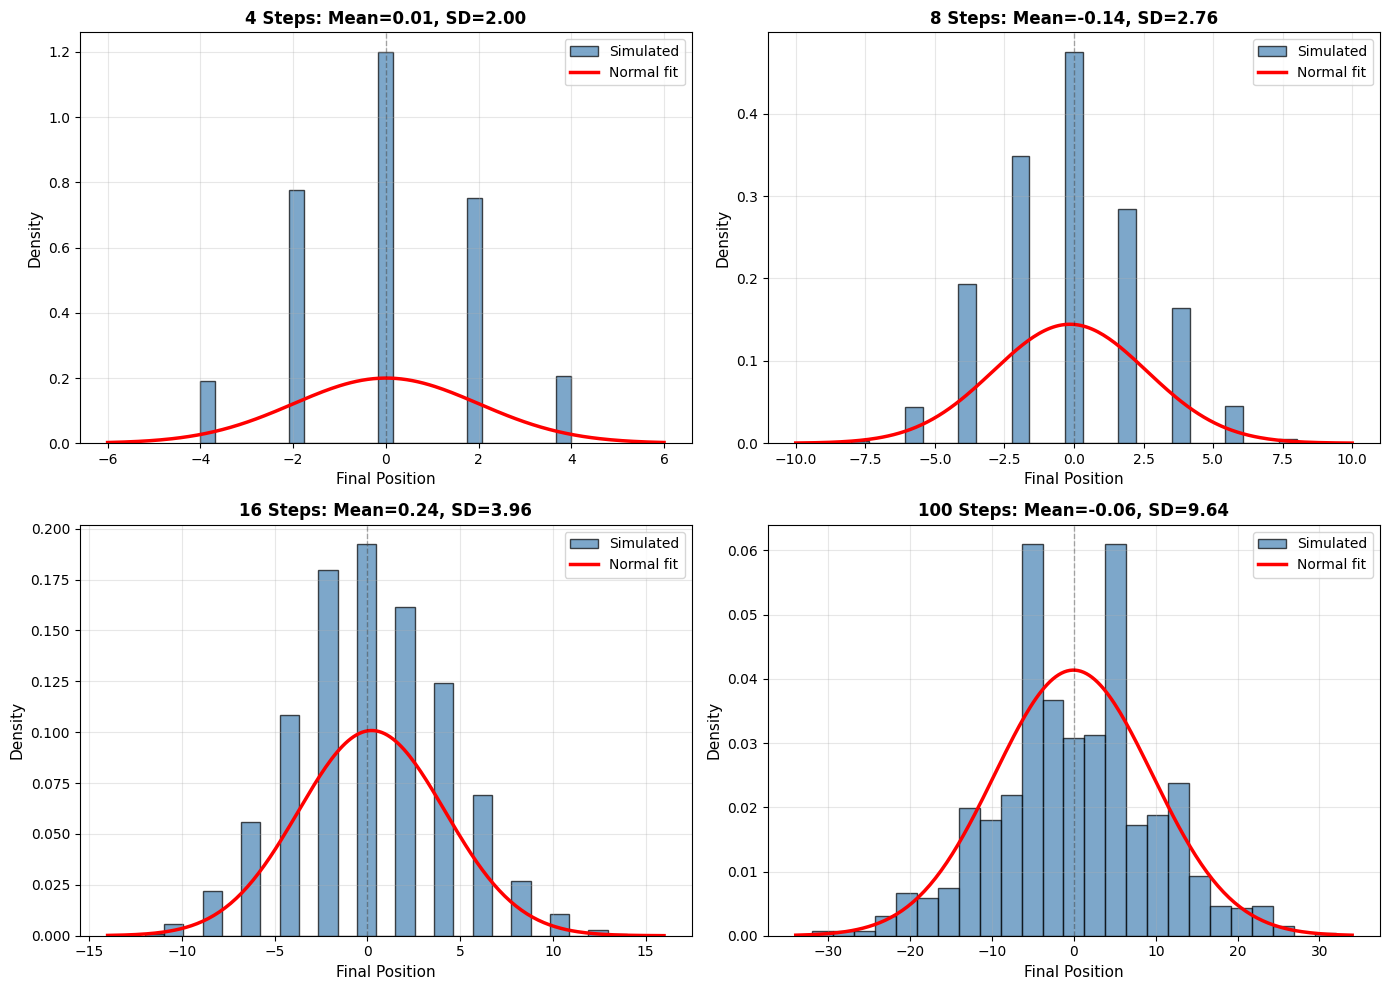

Observations:
• 4 steps: Still quite discrete, not very Normal
• 8 steps: Starting to look bell-shaped
• 16 steps: Very close to Normal
• 100 steps: Almost perfectly Normal!

The Central Limit Theorem: More steps → Better Normal approximation


In [16]:
# Different numbers of steps to try
step_counts = [4, 8, 16, 100]
N_people = 1000  # More people for smoother histograms

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

np.random.seed(42)

for idx, N_steps in enumerate(step_counts):
    ax = axes[idx]
    
    # Run simulation
    positions = np.zeros(N_people)
    for step in range(N_steps):
        tosses = np.random.binomial(n=1, p=0.5, size=N_people)
        tosses[tosses == 0] = -1
        positions = positions + tosses
    
    # Plot histogram
    ax.hist(positions, bins=25, density=True, alpha=0.7, color='steelblue', 
            edgecolor='black', label='Simulated')
    
    # Overlay Normal
    mean_pos = positions.mean()
    std_pos = positions.std()
    x_range = np.linspace(positions.min()-2, positions.max()+2, 200)
    normal_pdf = stats.norm.pdf(x_range, loc=mean_pos, scale=std_pos)
    ax.plot(x_range, normal_pdf, 'r-', linewidth=2.5, label='Normal fit')
    
    # Formatting
    ax.set_xlabel('Final Position', fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(f'{N_steps} Steps: Mean={mean_pos:.2f}, SD={std_pos:.2f}', 
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.axvline(0, color='black', linestyle='--', linewidth=1, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observations:")
print("• 4 steps: Still quite discrete, not very Normal")
print("• 8 steps: Starting to look bell-shaped")
print("• 16 steps: Very close to Normal")
print("• 100 steps: Almost perfectly Normal!")
print("\nThe Central Limit Theorem: More steps → Better Normal approximation")

---

## The Mathematical Story

### What's Happening?

**Each step** is a random variable:
- Xᵢ ∈ {-1, +1} with equal probability
- Mean: E[Xᵢ] = 0
- Variance: Var[Xᵢ] = 1

**Final position** after n steps:
$$S_n = X_1 + X_2 + ... + X_n$$

**The Central Limit Theorem** says:
$$\frac{S_n - n\mu}{\sigma\sqrt{n}} \xrightarrow{d} \text{Normal}(0, 1)$$

In our case (μ=0, σ=1):
$$\frac{S_n}{\sqrt{n}} \xrightarrow{d} \text{Normal}(0, 1)$$

Or equivalently:
$$S_n \xrightarrow{d} \text{Normal}(0, n)$$

### Theoretical Predictions

After **n** steps, position should be approximately:
- **Mean**: μ = 0 (equal chance left/right)
- **Standard deviation**: σ = √n

Let's verify this!

In [17]:
# Verify the theoretical prediction
step_counts = [10, 50, 100, 200, 500, 1000]
N_people = 10000  # Many people for accurate statistics

print("Verifying: Standard deviation should equal √n")
print("="*60)
print(f"{'Steps (n)':<15} {'Theoretical √n':<20} {'Simulated SD':<20}")
print("-"*60)

np.random.seed(123)

for N_steps in step_counts:
    # Run simulation
    positions = np.zeros(N_people)
    for step in range(N_steps):
        tosses = np.random.binomial(n=1, p=0.5, size=N_people)
        tosses[tosses == 0] = -1
        positions = positions + tosses
    
    # Compare
    theoretical_sd = np.sqrt(N_steps)
    simulated_sd = positions.std()
    
    print(f"{N_steps:<15} {theoretical_sd:<20.2f} {simulated_sd:<20.2f}")

print("="*60)
print("✓ Theory matches simulation! SD = √n")

Verifying: Standard deviation should equal √n
Steps (n)       Theoretical √n       Simulated SD        
------------------------------------------------------------
10              3.16                 3.21                
50              7.07                 7.01                
100             10.00                10.01               
200             14.14                14.02               
500             22.36                22.34               
1000            31.62                31.51               
✓ Theory matches simulation! SD = √n


---

## Summary: Why We Use Normal Distributions

### The Central Limit Theorem

**Statement:** The sum of many independent random variables (with finite variance) approaches a Normal distribution, regardless of the original distribution!

**Requirements:**
1. Independent random variables
2. Identically distributed (or similar)
3. Finite variance
4. Many of them!

**Result:** Even if individual effects are:
- Binary (coin flips)
- Exponential
- Uniform
- Discrete

Their **sum** will be approximately Normal!

### Connection to Chapter 4: Gaussian Models

**Why we model errors as Normal:**

```
yᵢ = μᵢ + εᵢ
εᵢ ~ Normal(0, σ)
```

**Justification:** The error εᵢ is the **sum of many small, unmodeled effects**:
- Measurement errors
- Biological variation
- Random environmental factors
- Genetic factors we didn't measure
- Etc.

By the CLT, this sum → Normal!

### Real-World Examples

**Height:**
```
Height = Genetic factors + Nutrition + Health + Random variations
       = Sum of many effects → Normal!
```

**Test scores:**
```
Score = Ability + Preparation + Luck + Mood + Question difficulty + ...
      = Sum of many effects → Normal!
```

**Measurement error:**
```
Measured value = True value + Instrument noise + Human error + ...
               = True value + Sum of errors → Normal!
```

### Key Takeaway

**The Normal distribution is ubiquitous** not because nature "likes" it, but because:
1. Many phenomena are **sums of many small effects**
2. The CLT guarantees these sums are approximately Normal
3. This is why Gaussian models (Chapter 4) are so powerful!

**This justifies our modeling choice:**
```
height ~ Normal(μ, σ)
μ = α + β·weight
```

We're not arbitrarily choosing Normal - it's mathematically justified by the additive nature of many natural processes!